# To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Linear Regression
Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.

# Simple Linear Regression
Simple Linear regression is a statistical approach for modelling relationship between a dependent variable with a single independent variable.

In [32]:
# import all the libraries required

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset is imported successfully


**importing the data**

In [58]:
url="http://bit.ly/w-data"
dataset=pd.read_csv(url)
print("dataset is imported successfully")
dataset.head()

dataset is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [59]:
dataset.shape

(25, 2)

In [60]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [61]:
dataset.isnull().sum() # to check whether null values are present or not

Hours     0
Scores    0
dtype: int64

**Lets try to plot the graph and see if there is any sort of relationship.**

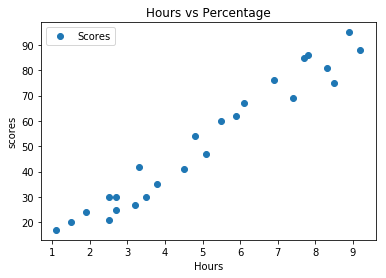

In [62]:
#lets plot the graph

dataset.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("scores")
plt.show()

**From the graph we can clearly see that there is a linear relation between hours and scores.**
## Preparing Data

In [63]:
# selecting the inputs and output
X = dataset.iloc[:, :-1].values # X is score
y = dataset.iloc[:, 1].values   # y is hours



Now we need to divide our dataset into training and test data in 80:20 ratio. To do this we need to use sklearn.model_selection built in train_test_split() method

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Training the data
Now we have divided the dataset in training and test data, lets tain our algorithm.

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete")

Training complete


2.018160041434683
[9.91065648]


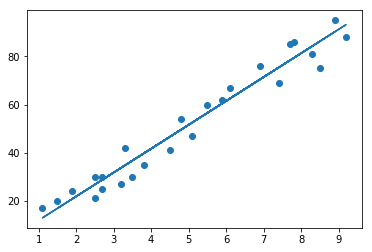

In [70]:
print(regressor.intercept_)
print(regressor.coef_)

# lets plot the regression line
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

## Predictions

In [ ]:
# predicting y values by using the test values of x
y_pred = regressor.predict(X_test)


- **Comparing the actual values with Predicted values**

In [49]:
# comparing the values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing 

In [72]:
# testing the output for 9.25 hours
hours = 9.25
own_pred = regressor.predict([[hours]])
print("the predicted score value for 9.25 hours is",own_pred)

the predicted score value for 9.25 hours is [93.69173249]


### Evaluating the model
This step is used to check how well the algorithm has performed.

In [74]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Root Mean Squared Error: 4.6474476121003665
